# Lab 1: The Apollo Missions

## Constants

In [11]:
import numpy as np
import matplotlib.pyplot as plt
G = 6.67e-11 #m^3/kg/s^2
g = 9.81 #m/s^2
Me = 5.9e24 #kg
Mm = 7.3e22 #kg
Macm = 5500 #kg
re = 6378 #km
rm = 1737 #km
dem = 3.8e8 #m
ve = 2.4e3 #m/s
m = 1.3e4 #kg/s
m0 = 2.4e3 #m/s
mf = 7.5e5 #kg

## Part 1: The Gravitational Potential of the Earth

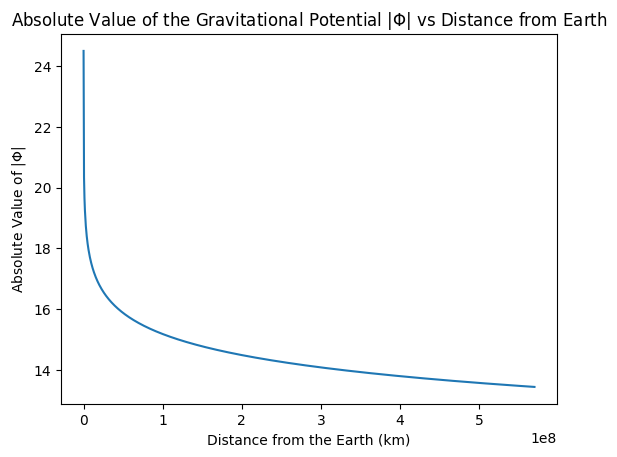

In [12]:
# Question 1
def potential(xm, ym, m, x=0, y=0):
    dist = np.sqrt((x-xm)**2 + (y-ym)**2)
    dist[np.isclose(dist, 0, atol = 0.1)] = np.nan
    return -G * m/dist

#Question 2
x = np.linspace(re, dem * 1.5, 1000)
y = potential(x,re, Me)
fig, ax = plt.subplots()
ax.plot(x, np.log(np.abs(y)))

ax.set_title(r"Absolute Value of the Gravitational Potential $|\Phi|$ vs Distance from Earth")
ax.set_xlabel("Distance from the Earth (km)")
ax.set_ylabel(r"Absolute Value of $|\Phi|$");

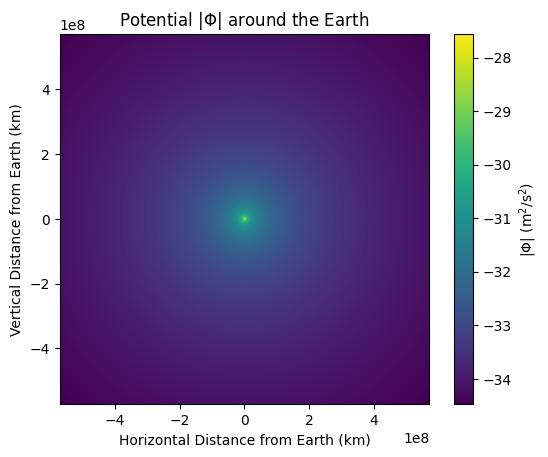

In [56]:
#Question 3
import matplotlib.cm as cm
x = np.linspace(-1.5 * dem, 1.5*dem, 1000)
y = np.linspace(-1.5 * dem, 1.5*dem, 1000)
X,Y = np.meshgrid(x,y)
phi = potential(X,Y,m)

fig, ax = plt.subplots()
contour = ax.pcolormesh(X,Y,np.log(np.abs(phi)))
bar = fig.colorbar(contour)
bar.set_label(r"$|\Phi|$ (m$^2$/s$^2$)")
ax.set_aspect("equal")
ax.set_title(r"Potential $|\Phi|$ around the Earth")
ax.set_xlabel("Horizontal Distance from Earth (km)")
ax.set_ylabel("Vertical Distance from Earth (km)");

## Part 2: The Gravitational Potential of the Earth Moon System

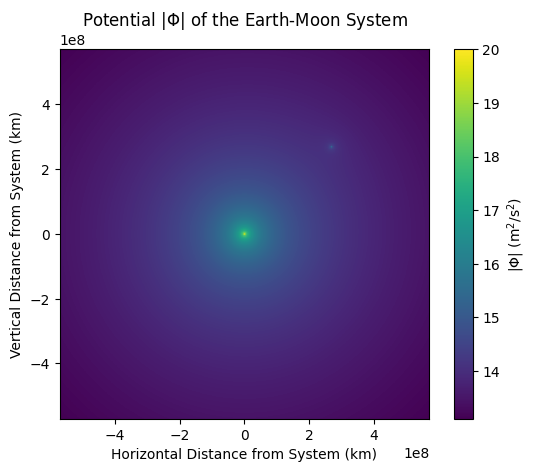

In [57]:
#Question 1
def empot(x,y):
    return potential(x,y,Me) + potential(x, y, Mm, dem/np.sqrt(2), dem/np.sqrt(2))

emPhi = empot(X,Y)

fig, ax = plt.subplots()
contour = ax.pcolormesh(X,Y,np.log(np.abs(emPhi)))
bar = fig.colorbar(contour)
bar.set_label(r"$|\Phi|$ (m$^2$/s$^2$)")
ax.set_aspect("equal")
ax.set_title(r"Potential $|\Phi|$ of the Earth-Moon System")
ax.set_xlabel("Horizontal Distance from System (km)")
ax.set_ylabel("Vertical Distance from System (km)");

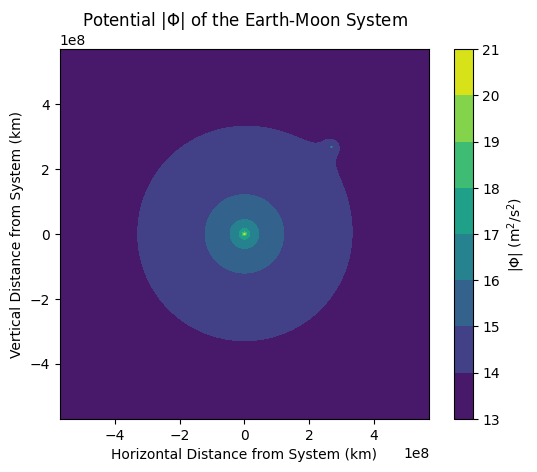

In [58]:
#Question 2
fig, ax = plt.subplots()
contour = ax.contourf(X,Y,np.log(np.abs(emPhi)))
bar = fig.colorbar(contour)
bar.set_label(r"$|\Phi|$ (m$^2$/s$^2$)")
ax.set_aspect("equal")
ax.set_title(r"Potential $|\Phi|$ of the Earth-Moon System")
ax.set_xlabel("Horizontal Distance from System (km)")
ax.set_ylabel("Vertical Distance from System (km)");

## Part 3: The Gravitational Force Field of the Earth-Moon System

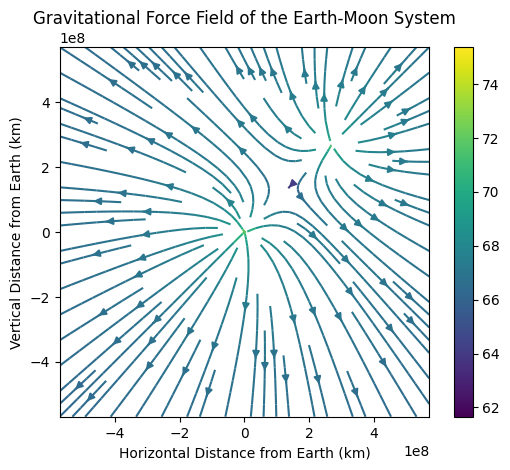

In [37]:
# Question 1
def gForce(m1, m2, x1, y1, x2, y2):
    dist = np.sqrt((x1-x2)**2 + (y1-y2)**2)
    dist[np.isclose(dist, 0, atol = 0.1)] = np.nan
    Fm = G * m1 * m2 / dist
    Fx = Fm * (x2 - x1) / dist
    Fy = Fm * (y2 - y1) / dist
    return Fx, Fy

# Question 2
fig, ax = plt.subplots()
Fx, Fy = gForce(Me, Mm, 0, 0, X, Y)
Fxm, Fym = gForce(Mm, Me, dem/np.sqrt(2), dem/np.sqrt(2), X, Y)
Fxt = Fx + Fxm
Fyt = Fy + Fym
colors = np.log(np.hypot(Fxt, Fyt))
stream = ax.streamplot(X,Y,Fxt,Fyt, color = colors)
bar = fig.colorbar(stream.lines)
bar.set_label(
ax.set_aspect("equal")
ax.set_title("Gravitational Force Field of the Earth-Moon System")
ax.set_xlabel("Horizontal Distance from Earth (km)")
ax.set_ylabel("Vertical Distance from Earth (km)");

## Part 4: Altitude of the Saturn V Rocket

In [55]:
from scipy.integrate import quad
#Question 1
T = (m0-mf)/m

#Question 2
def delV(t, m0, mf, m, ve, g):
    mt = m0 - m * t
    return ve * np.log(m0/mt) - g * t

#Question 3
def v(t):
    return delV(t, m0, mf, m, ve, g)

altitude, _ = quad(v, 0, T)
print(altitude)

641166.8155380365
